<a href="https://colab.research.google.com/github/NT-ThuHang/-AI-Fundamentals/blob/main/identify_bounding_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
import os

id = '1wiu8nb7zFu9gxJRKlhs9lWO7ZyN_Tssh' # file's id (change your file's id)

url = 'https://drive.google.com/u/1/uc?id={}&export=download'.format(id)
output = './dataset.zip'
gdown.download(url, output, quiet=False)
!unzip dataset.zip
os.remove('./dataset.zip')

In [43]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

(720, 1280, 3)


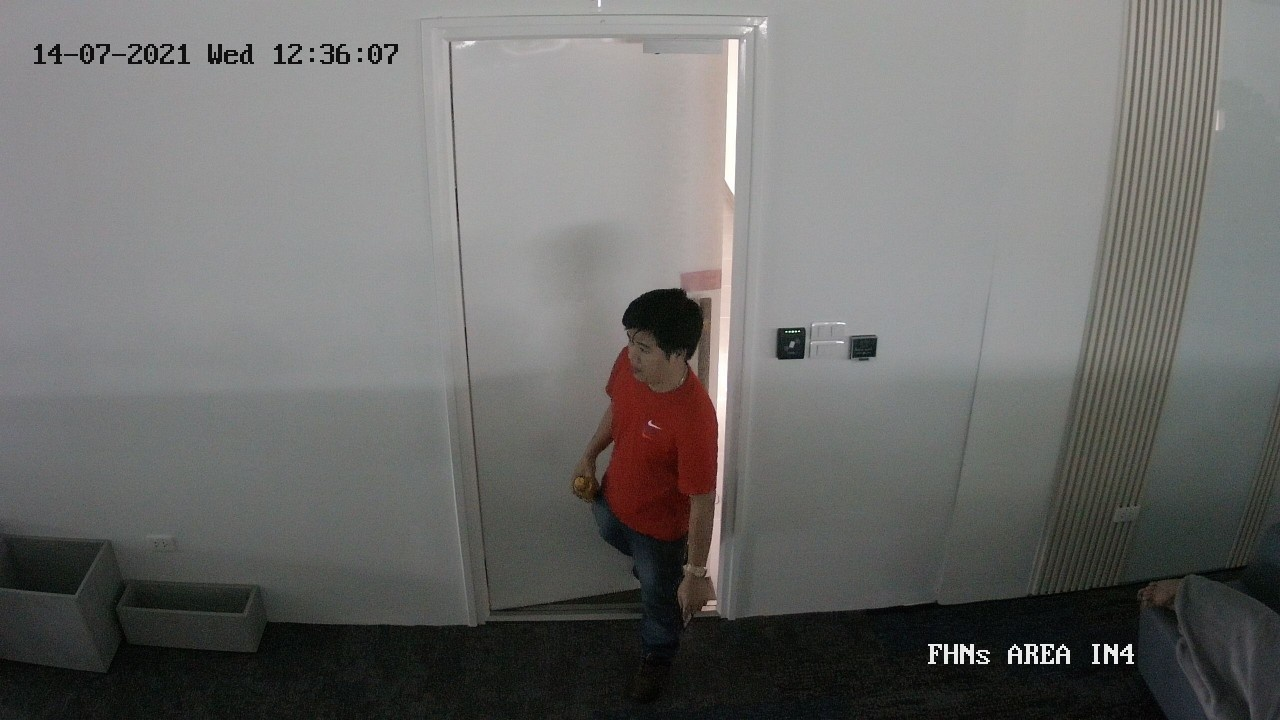

In [101]:
img = cv2.imread('/content/dataset/images/train/10.35.17.101_01_20210714123608414_MOTION_DETECTION.jpg')
print(img.shape)
cv2_imshow(img)

In [100]:
bounding_boxs = []
with open('/content/dataset/labels/train/10.35.17.101_01_20210714123608414_MOTION_DETECTION.txt') as f:
    lines = f.readlines()


for line in lines:
  box = line[:-1].split(" ")[1:]
  bounding_boxs.append(box)

bounding_boxs = np.array(bounding_boxs, dtype=np.float32)
print(bounding_boxs)

[[0.507031  0.497222  0.0421875 0.0805556]]


In [200]:
status = ['no-mask', ' mask', 'incorrect mask']

In [140]:
def yolobbox2bbox(height, width,x,y,w,h):
  x1, y1 = round((x-w/2)*width), round((y-h/2)*height)
  x2, y2 = round((x+w/2)*width), round((y+h/2)*height)
  return x1, y1, x2, y2

In [205]:
def draw_bounding_box(id_image):
  #get path
  image_path = f'/content/dataset/images/train/{id_image}.jpg'
  label_path = f'/content/dataset/labels/train/{id_image}.txt'
  folder = f'/content/drive/MyDrive/Data Competition-FPT/CheckLabels/{id_image}.jpg'
  #read image and image_size
  img = cv2.imread(image_path)
  (height, width) = img.shape[:2]

  #get label and bounding boxes
  labels = []
  boxes = []
  with open(label_path) as f:
    lines = f.readlines()
    
  for line in lines:
    labels.append(line.split(" ")[0])
    box = line[:-1].split(" ")[1:]
    boxes.append(box)

  labels = np.array(labels, dtype=np.int32)  
  boxes = np.array(boxes, dtype=np.float32)
  #draw bounding box
  for i,box in enumerate(boxes):
    (x,y,w,h) = box
    (x1,y1,x2,y2) = yolobbox2bbox(height, width, x,y,w,h)
    img = cv2.rectangle(img, (x1,y1), (x2, y2), (35,255,12), 2)
    img = cv2.putText(img, status[labels[i]] , (x1-5,y1-5), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, 255)
    
    
  cv2.imwrite(folder,img)





In [206]:
draw_bounding_box("10.35.17.101_01_20210714123608414_MOTION_DETECTION")

[[0.507031  0.497222  0.0421875 0.0805556]]
0


In [192]:
ID_images = []
for root, dirs, files in os.walk("/content/dataset/images", topdown=False):
   for name in files:
     ID_images.append(name[:-4])

In [208]:
for id in ID_images:
  try:
    draw_bounding_box(id)
  except:
    continue

[[0.116797  0.581944  0.0585938 0.125    ]]
0
[[0.319531 0.415278 0.039062 0.080556]]
0
[[0.621484 0.646528 0.077344 0.079167]
 [0.770312 0.13125  0.026562 0.043056]
 [0.882422 0.034028 0.022656 0.056944]
 [0.677344 0.020139 0.020313 0.0375  ]]
0
1
2
3
[[0.525391 0.238889 0.041406 0.080556]]
0
[[0.758984 0.743056 0.060156 0.105556]]
0
[[0.243359 0.381944 0.041406 0.088889]
 [0.773828 0.455556 0.042969 0.088889]
 [0.028125 0.575694 0.029687 0.090278]]
0
1
2
[[0.446875  0.18125   0.04375   0.0819444]]
0
[[0.164453 0.465972 0.044531 0.120833]
 [0.266797 0.597917 0.041406 0.106944]]
0
1
[[0.435967 0.381173 0.13079  0.16358 ]
 [0.168256 0.478395 0.099455 0.095679]]
0
1
[[0.332031 0.148611 0.035937 0.066667]
 [0.630078 0.259722 0.044531 0.094444]
 [0.46875  0.131944 0.032813 0.075   ]
 [0.209375 0.277083 0.035937 0.073611]]
0
1
2
3
[[0.405469 0.163889 0.03125  0.072222]]
0
[[0.821875  0.813889  0.0765625 0.133333 ]
 [0.538672  0.327083  0.0664062 0.109722 ]]
0
1
[[0.420703  0.454167  0.05234